# Proyecto Individual 02

Rol a desarrollar

Importamos librerias necesarias

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Primero, necesitamos obtener los datos del mercado bursátil del índice SP500. Podemos utilizar la API de Yahoo Finance para obtener los precios históricos de las acciones de las empresas del SP500.

In [32]:
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')


[*********************100%***********************]  1 of 1 completed


Guardar los datos en un archivo csv

In [35]:
sp500_data.to_csv('SP500.csv')

Ahora que tenemos los datos, es importante realizar un análisis exploratorio para entenderlos mejor. El objetivo es entender las características de los datos y encontrar patrones y relaciones entre ellos.

In [2]:
# Leer el archivo CSV
df_sp500 = pd.read_csv('./SP500.csv')

En primer lugar, vamos a ver cómo se ven los datos utilizando la función **head()**:

In [3]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Se muestran los primeros registros del DataFrame. Podemos ver que la información incluye los precios de apertura, cierre, máximo, mínimo, volumen y precios ajustados de las acciones en sus respectivas fechas.

Para que la visualizacion sea mas facil de leer y comprender se realizaran los siguientes cambios

In [4]:
# renombramos las columnas al español
df_sp500 = df_sp500.rename(columns={
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [5]:
# redondear a 2 decimales
df_sp500 = df_sp500.round(2)

In [6]:
df_sp500

,Fecha,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...,...
5817,2023-02-15,4119.50,4148.11,4103.98,4147.60,4147.60,4075980000
5818,2023-02-16,4114.75,4136.54,4089.49,4090.41,4090.41,4143660000
5819,2023-02-17,4077.39,4081.51,4047.95,4079.09,4079.09,4045480000
5820,2023-02-21,4052.35,4052.35,3995.19,3997.34,3997.34,4121590000


Podemos obtener más información del DataFrame utilizando la función **info()**:

In [7]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            5822 non-null   object 
 1   Apertura         5822 non-null   float64
 2   Máximo           5822 non-null   float64
 3   Mínimo           5822 non-null   float64
 4   Cierre           5822 non-null   float64
 5   Cierre Ajustado  5822 non-null   float64
 6   Volumen          5822 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 318.5+ KB


Esta función nos muestra información sobre el tamaño del DataFrame, el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.

Ahora, vamos a calcular algunas estadísticas descriptivas para tener una idea general de los datos:

In [8]:
df_sp500.describe().round(2)

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
count,5822.00,5822.00,5822.00,5822.00,5822.00,5.822000e+03
mean,1886.49,1897.78,1874.26,1886.71,1886.71,3.302644e+09
std,976.76,981.89,971.19,976.89,976.89,1.522890e+09
min,679.28,695.27,666.79,676.53,676.53,3.560700e+08
25%,1184.60,1191.76,1177.14,1184.42,1184.42,1.985738e+09
50%,1434.52,1443.68,1425.54,1434.43,1434.43,3.408845e+09
75%,2390.74,2395.65,2380.30,2389.33,2389.33,4.159688e+09
max,4804.51,4818.62,4780.04,4796.56,4796.56,1.145623e+10


Esta función nos mostrará la cantidad de registros, la media, la desviación estándar, los valores mínimos y máximos y los cuartiles de cada columna del DataFrame.

Como se van a realizar operaciones que implican seleccionar, filtrar o agrupar datos según la fecha, se indexara la columna **'fecha'**

In [14]:
df_sp500 = df_sp500.set_index('Fecha')

#se convierten la columna con to_datetime
df_sp500.index = pd.to_datetime(df_sp500.index)

In [16]:
df_sp500

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
Fecha,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2023-02-15,4119.50,4148.11,4103.98,4147.60,4147.60,4075980000
2023-02-16,4114.75,4136.54,4089.49,4090.41,4090.41,4143660000
2023-02-17,4077.39,4081.51,4047.95,4079.09,4079.09,4045480000


El precio de **cierre ajustado** tiene en cuenta cualquier evento corporativo que pueda afectar el precio de una acción o de un índice. Por ejemplo, las divisiones de acciones, las fusiones o las adquisiciones pueden afectar el precio de una acción o de un índice. El precio de cierre ajustado se calcula teniendo en cuenta estos eventos corporativos.

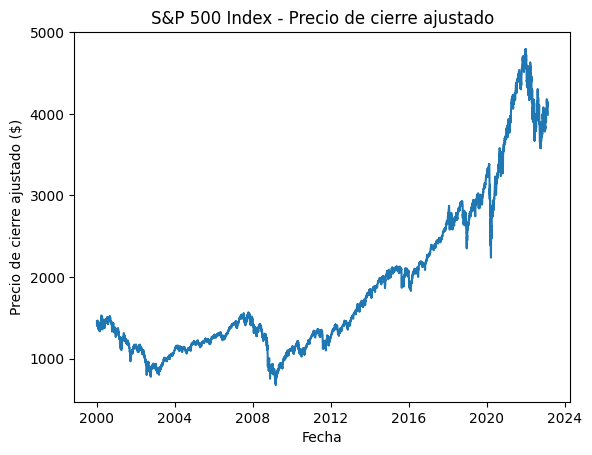

In [15]:
# Trazar el precio de cierre ajustado
plt.plot(df_sp500['Cierre Ajustado'])

# Configurar el título y las etiquetas de los ejes
plt.title('S&P 500 Index - Precio de cierre ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado ($)')
#plt.grid(True)

# Mostrar el gráfico
plt.show()

In [17]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

# Crear el gráfico de velas
fig, ax = plt.subplots(figsize=(12,6))
ohlc = df_sp500[['Apertura', 'Máximo', 'Mínimo', 'Cierre']].reset_index()
ohlc['Fecha'] = ohlc['Fecha'].map(mdates.date2num)
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.set_title("Gráfico de velas del S&P 500 desde 2000 hasta 2023", fontsize=16)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Precio de cierre ajustado (USD)", fontsize=12)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

ModuleNotFoundError: No module named 'mpl_finance'